<ipython-input-29-3c1e43ad18ca>:22: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.4613 - loss: 1.7974 - val_accuracy: 0.6218 - val_loss: 1.2536
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6168 - loss: 1.2253 - val_accuracy: 0.6498 - val_loss: 1.1001
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6407 - loss: 1.1210 - val_accuracy: 0.6672 - val_loss: 1.0361
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6534 - loss: 1.0593 - val_accuracy: 0.6737 - val_loss: 1.0022
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6589 - loss: 1.0330 - val_accuracy: 0.6767 - val_loss: 0.9814
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6624 - loss: 1.0159 - val_accuracy: 0.6805 - val_loss: 0.9676
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6658 - loss: 1.0002 - val_accuracy: 0.6827 - val_loss: 0.9582
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6642 - loss: 

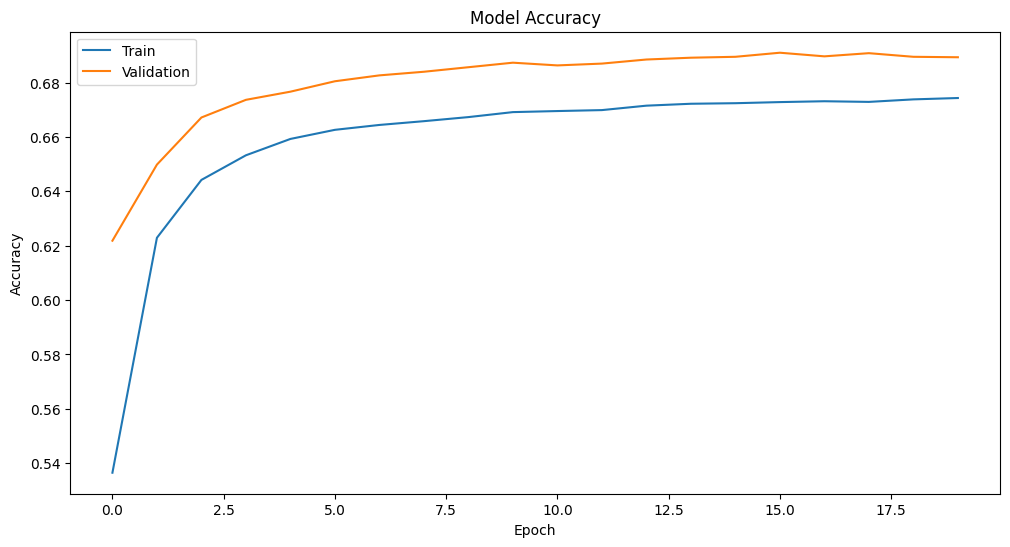

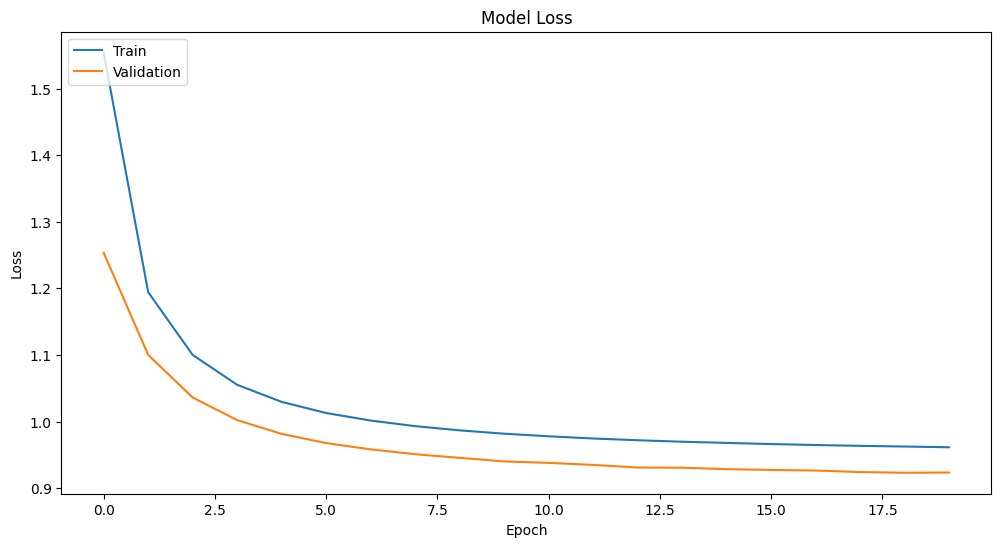

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


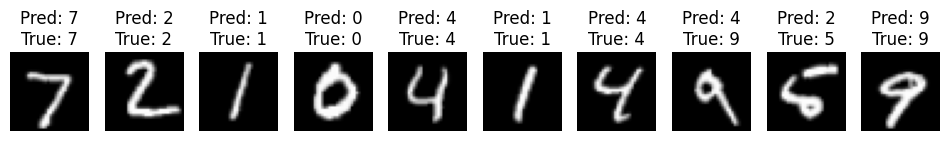

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, -1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, -1).astype('float32') / 255.0
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split=0.1, batch_size=32)


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


predictions = model.predict(x_test)

def plot_images(images, labels, predictions, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

plot_images(x_test, y_test, predictions)
